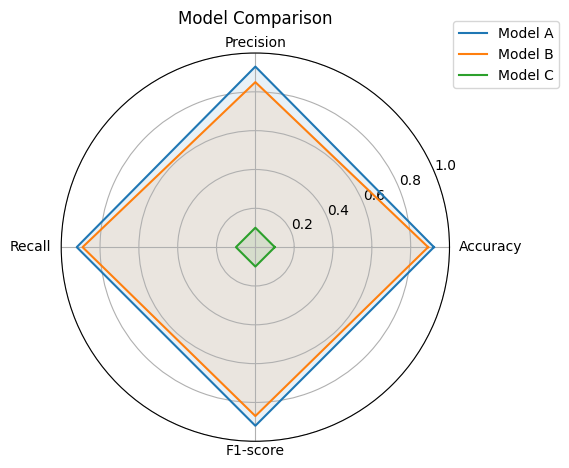

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
stats = {
    'Model A': [0.92, 0.93, 0.92, 0.92],
    'Model B': [0.89, 0.85, 0.89, 0.87],
    'Model C': [0.1, 0.1, 0.1, 0.1],
}

# setup the data
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# prepare the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# plot the data
for model, scores in stats.items():
    values = scores + scores[:1]
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.1)

# draw lines without labels
ax.set_thetagrids(np.degrees(angles[:-1]), ["" for _ in labels])  

# draw labels
for i, label in enumerate(labels):
    angle_rad = angles[i]
    if i == 0:
        ha = 'left'
    elif i == 2:
        ha = 'right'
    else:
        ha = 'center'

    ax.text(
        angle_rad,
        1.05,
        label,
        size=10,
        horizontalalignment=ha,
        verticalalignment='center',
        transform=ax.get_xaxis_transform(),
    )

# minor adjustments to the plot
ax.set_ylim(0, 1)
ax.set_title('Model Comparison\n')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# plot it
plt.tight_layout()
plt.show()
